<a href="https://colab.research.google.com/github/nikunjchapadia/fastbook/blob/master/collaborative_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 14.0 MB/s 
     |████████████████████████████████| 1.2 MB 55.7 MB/s 
     |████████████████████████████████| 46 kB 4.4 MB/s 
     |████████████████████████████████| 189 kB 56.6 MB/s 
     |████████████████████████████████| 56 kB 5.0 MB/s 
     |████████████████████████████████| 51 kB 341 kB/s 
Mounted at /content/gdrive


In [5]:
from fastbook import *

In [6]:
from fastai.collab import *
from fastai.tabular.all import *
path = untar_data(URLs.ML_100k)

In [11]:
ratings = pd.read_csv(
    path/'u.data', 
    delimiter='\t', 
    header=None,
    names=['user', 'movie', 'rating', 'timestamp']
)

ratings.head()

,user,movie,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
# cross tab 


In [ ]:
last_skywaker = np.array([0.98, 0.9, -0.9])

In [ ]:
user1 = np.array([0.9, 0.8, -0.6])

In [ ]:
user1*last_skywaker, (user1*last_skywaker).sum()

(array([0.882, 0.72 , 0.54 ]), 2.1420000000000003)

In [ ]:
casablanca = np.array([-0.99, -0.3, 0.8])

In [ ]:
user1*casablanca, (user1*casablanca).sum()

(array([-0.891, -0.24 , -0.48 ]), -1.611)

In [ ]:
# we dont know what the latent factors actually are
# we dont know how to score them for each user and movie 
# we should learn them 

# latent factors

In [12]:
movies = pd.read_csv(
    path/'u.item', 
    delimiter='|', 
    encoding='latin-1',
    usecols=(0,1),
    header=None,
    names=['movie', 'title']
)

movies.head()

,movie,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [13]:
ratings = ratings.merge(movies)
ratings.head()

,user,movie,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [14]:
dls = CollabDataLoaders.from_df(ratings, item_name='title', bs=64)
dls.show_batch()

,user,title,rating
0,542,My Left Foot (1989),4
1,422,Event Horizon (1997),3
2,311,"African Queen, The (1951)",4
3,595,Face/Off (1997),4
4,617,Evil Dead II (1987),1
5,158,Jurassic Park (1993),5
6,836,Chasing Amy (1997),3
7,474,Emma (1996),3
8,466,Jackie Chan's First Strike (1996),3
9,554,Scream (1996),3


In [ ]:
dls.classes

{'title': ['#na#', "'Til There Was You (1997)", '1-900 (1994)', '101 Dalmatians (1996)', '12 Angry Men (1957)', '187 (1997)', '2 Days in the Valley (1996)', '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)', '3 Ninjas: High Noon At Mega Mountain (1998)', '39 Steps, The (1935)', '8 1/2 (1963)', '8 Heads in a Duffel Bag (1997)', '8 Seconds (1994)', 'A Chef in Love (1996)', 'Above the Rim (1994)', 'Absolute Power (1997)', 'Abyss, The (1989)', 'Ace Ventura: Pet Detective (1994)', 'Ace Ventura: When Nature Calls (1995)', 'Across the Sea of Time (1995)', 'Addams Family Values (1993)', 'Addicted to Love (1997)', 'Addiction, The (1995)', 'Adventures of Pinocchio, The (1996)', 'Adventures of Priscilla, Queen of the Desert, The (1994)', 'Adventures of Robin Hood, The (1938)', 'Affair to Remember, An (1957)', 'African Queen, The (1951)', 'Afterglow (1997)', 'Age of Innocence, The (1993)', 'Aiqing wansui (1994)', 'Air Bud (1997)', 'Air Force One (1997)', 'Air Up There, The (199

In [15]:
n_users = len(dls.classes['user'])
n_movies = len(dls.classes['title'])
n_factors = 5
n_users, n_movies, n_factors

(944, 1665, 5)

In [16]:
user_factors = torch.randn(n_users, n_factors)
movie_factors = torch.randn(n_movies, n_factors)

In [17]:
one_hot_3 = one_hot(3, n_users).float()
user_factors.t() @ one_hot_3

tensor([-0.4586, -0.9915, -0.4052, -0.3621, -0.5908])

In [ ]:
one_hot_3, one_hot_3.shape, user_factors

(tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [ ]:
user_factors.t() @ one_hot_3

tensor([-0.4586, -0.9915, -0.4052, -0.3621, -0.5908])

In [ ]:
user_factors[3]

tensor([-0.4586, -0.9915, -0.4052, -0.3621, -0.5908])

In [ ]:
# embedding matrix


In [ ]:
class Example:
  def __init__(self, a):
    self.a = a

  def say(self, x):
    return f'Hello {self.a}, {x}.'

In [ ]:
ex = Example('Aum')
ex.say('Namaste')

'Hello Aum, Namaste.'

In [19]:
# Architecture 
class DotProduct(Module):
    def __init__(self, n_users, n_movies, n_factors):
        self.user_factors = Embedding(n_users, n_factors)
        self.movie_factors = Embedding(n_movies, n_factors)
        
    def forward(self, x):
        users = self.user_factors(x[:,0])
        movies = self.movie_factors(x[:,1])
        return (users * movies).sum(dim=1)

In [20]:
x,y = dls.one_batch()
x.shape

torch.Size([64, 2])

In [21]:
x

tensor([[ 661,  659],
        [ 861,  730],
        [ 766,    8],
        [  13, 1153],
        [ 429, 1185],
        [ 488, 1242],
        [ 675, 1638],
        [ 271,  987],
        [ 677,  772],
        [ 301, 1139],
        [ 874,  830],
        [ 593, 1097],
        [ 814, 1065],
        [ 897,  274],
        [ 635, 1370],
        [ 567, 1067],
        [ 399,  241],
        [ 649, 1524],
        [ 309, 1347],
        [ 378,  356],
        [ 104, 1589],
        [ 197,  622],
        [ 886, 1442],
        [  78, 1610],
        [ 480,  774],
        [ 457,  110],
        [ 815, 1290],
        [ 840,  624],
        [ 804,  180],
        [ 627, 1017],
        [ 102,  600],
        [ 904,  374],
        [ 301,  262],
        [ 561,  374],
        [ 301,  754],
        [ 439,  426],
        [ 171, 1303],
        [ 730, 1102],
        [ 239, 1649],
        [ 454,  274],
        [ 871, 1616],
        [ 653, 1246],
        [ 116,  927],
        [ 189, 1270],
        [ 524, 1457],
        [ 

In [22]:
n_users,n_movies
model = DotProduct(n_users, n_movies, 50)
model

DotProduct(
  (user_factors): Embedding(944, 50)
  (movie_factors): Embedding(1665, 50)
)

In [23]:
model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())

In [24]:
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,1.337945,1.276007,00:09
1,1.108481,1.123233,00:09
2,0.977215,1.002036,00:09
3,0.827388,0.900880,00:09
4,0.793363,0.887713,00:09


In [25]:
# result is not good we need use y range 

class DotProduct(Module):
    def __init__(self, n_users, n_movies, n_factors, y_range=(0,5.5)):
        self.user_factors = Embedding(n_users, n_factors)
        self.movie_factors = Embedding(n_movies, n_factors)
        self.y_range = y_range
        
    def forward(self, x):
        users = self.user_factors(x[:,0])
        movies = self.movie_factors(x[:,1])
        return sigmoid_range((users * movies).sum(dim=1), *self.y_range)

In [26]:
model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3)

epoch,train_loss,valid_loss,time
0,0.972302,0.991141,00:09
1,0.870617,0.915232,00:09
2,0.677327,0.875926,00:09
3,0.483030,0.880021,00:09
4,0.374193,0.884209,00:09


In [28]:
# not much change in results lets try bias

class DotProduct(Module):
    def __init__(self, n_users, n_movies, n_factors, y_range=(0,5.5)):
        self.user_factors = Embedding(n_users, n_factors)
        self.user_bias = Embedding(n_users, 1)
        self.movie_factors = Embedding(n_movies, n_factors)
        self.movie_bias = Embedding(n_movies, 1)
        self.y_range = y_range
        
    def forward(self, x):
        users = self.user_factors(x[:,0])
        movies = self.movie_factors(x[:,1])
        res = (users * movies).sum(dim=1, keepdim=True)
        res += self.user_bias(x[:,0]) + self.movie_bias(x[:,1])
        return sigmoid_range(res, *self.y_range)

In [30]:
model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(7, 5e-3)

epoch,train_loss,valid_loss,time
0,0.931637,0.958775,00:10
1,0.880872,0.879632,00:10
2,0.717028,0.867615,00:10
3,0.491820,0.916597,00:10
4,0.323855,0.954845,00:10
5,0.216153,0.977045,00:10
6,0.165654,0.981234,00:10


In [ ]:
# its overfitting 
# find a way to train more epoch without overfittinng 

# Regularisation technique - weight decay


#  add sum of all weights squared to loss function 
# why? when we compute gradients it will add a contributionnn to them that will 
# encourage the weights to be as small as possible. 

# why would it prevent overfitting?
# the larger the coefficiencies are the more sharp canyons will be in loss functiion

# basic parabola y = a * (x**2) the larger the a is the more narrow the parabola is

In [31]:
model = DotProduct(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.954444,0.956217,00:10
1,0.851033,0.879733,00:10
2,0.725101,0.835583,00:10
3,0.594524,0.822646,00:10
4,0.489663,0.823537,00:10


In [32]:
# Embedding 
# embeding layer is just computational shortucut 
# metrix multiplication by one hot encoding matrix 
# that is same as indexing an array

class T(Module):
  def __init__(self):
      self.a = torch.ones(3)


L(T().parameters())

(#0) []

In [33]:
# to tell Module that we wante to treat a tensor as parameter 
# wrap in in the nn.Parameter class 
# this doesnt add any functionality - it calles automatically requires_grad_() 
# its used as marker to show what to include in parameters()
class T(Module):
  def __init__(self):
      self.a = nn.Parameter(torch.ones(3))

L(T().parameters())

(#1) [Parameter containing:
tensor([1., 1., 1.], requires_grad=True)]

In [34]:
class T(Module):
  def __init__(self):
      self.a = nn.Linear(1,3, bias=False)

t = T()
L(t.parameters())

(#1) [Parameter containing:
tensor([[-0.1183],
        [ 0.4187],
        [-0.4856]], requires_grad=True)]

In [35]:
type(t.a.weight)

torch.nn.parameter.Parameter

In [36]:
# create tensor as a param with random init
def create_params1(size):
  # return nn.Parameter(torch.Variable(torch.zeros(*size).nomral_(0,0.01)))
  return nn.Parameter(torch.zeros(*size).nomral_(0,0.01))

In [37]:
def create_params(size):
    return nn.Parameter(torch.zeros(*size).normal_(0, 0.01))

In [38]:
# without pytorch layers 
class DotProductBias(Module):
    def __init__(self, n_users, n_movies, n_factors, y_range=(0,5.5)):
        self.user_factors = create_params([n_users, n_factors])
        self.user_bias = create_params([n_users])
        self.movie_factors = create_params([n_movies, n_factors])
        self.movie_bias = create_params([n_movies])
        self.y_range = y_range
        
    def forward(self, x):
        users = self.user_factors[x[:,0]]
        movies = self.movie_factors[x[:,1]]
        res = (users * movies).sum(dim=1)
        res += self.user_bias[x[:,0]] + self.movie_bias[x[:,1]]
        return sigmoid_range(res, *self.y_range)        

In [39]:
# model = DotProductBias(n_users, n_movies, 50)
# learn = Learner(dls, model, loss_func=MSELossFlat())
# learn.fit_one_cycle(5, 5e-3, wd=0.1)

model = DotProductBias(n_users, n_movies, 50)
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.935292,0.949804,00:10
1,0.854796,0.880386,00:10
2,0.712536,0.837566,00:10
3,0.583307,0.826300,00:10
4,0.489751,0.827275,00:10


In [43]:
movie_bias = learn.model.movie_bias.square()
movie_bias
idxs = movie_bias.argsort()[:5]

idxs, [dls.classes['title'][i] for i in idxs]
# movies with smallest bias
# these are the movies people dont like 
# even people like other moview in this genre but not this movies of same genre

(tensor([316, 859,   0, 436, 395]),
 ['Cliffhanger (1993)',
  'Leopard Son, The (1996)',
  '#na#',
  'Dragonheart (1996)',
  'Death in Brunswick (1991)'])

In [45]:
idxs = movie_bias.argsort(descending=True)[:10]
idxs, [dls.classes['title'][i] for i in idxs]
# these are the movies users like it

(tensor([1282,  830, 1501, 1318, 1216, 1399,  622, 1330,   93,  319]),
 ["Schindler's List (1993)",
  'L.A. Confidential (1997)',
  'Titanic (1997)',
  'Shawshank Redemption, The (1994)',
  'Rear Window (1954)',
  'Star Wars (1977)',
  'Good Will Hunting (1997)',
  'Silence of the Lambs, The (1991)',
  'Apt Pupil (1998)',
  'Close Shave, A (1995)'])

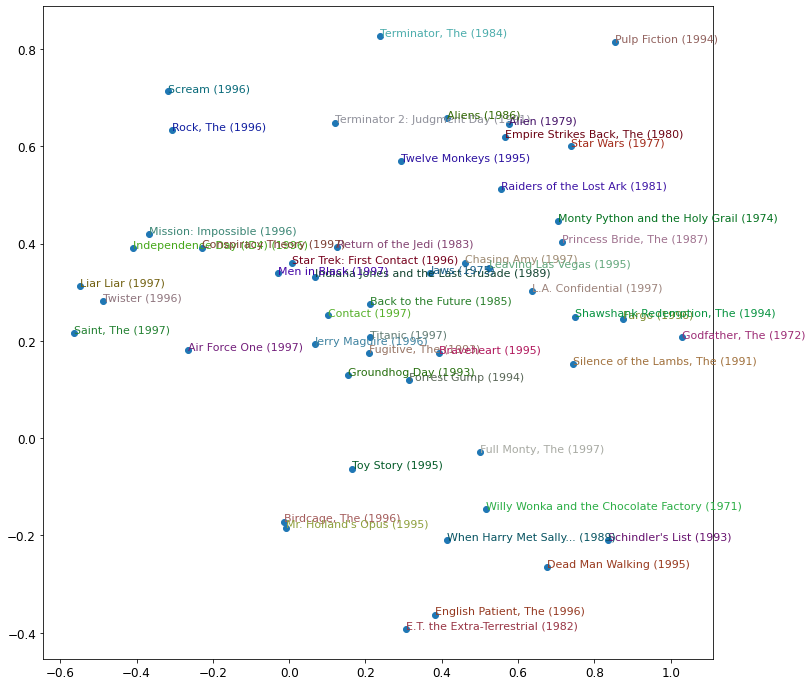

In [47]:
# so far we have seen bias factors 
# now we can see moview factors - too many to visualize 

#caption Representation of movies based on two strongest PCA components
#alt Representation of movies based on two strongest PCA components
g = ratings.groupby('title')['rating'].count()
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_idxs = tensor([learn.dls.classes['title'].o2i[m] for m in top_movies])
movie_w = learn.model.movie_factors[top_idxs].cpu().detach()
# technique - principle component analysis 
movie_pca = movie_w.pca(3)
fac0,fac1,fac2 = movie_pca.t()
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(12,12))
plt.scatter(X, Y)
for i, x, y in zip(top_movies[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

In [48]:
#  we dont need to do all manualy we can use existing lib 
learn = collab_learner(dls, n_factors=50, y_range=(0,5.5))

In [49]:
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.926020,0.947887,00:09
1,0.858643,0.873096,00:11
2,0.720770,0.841121,00:11
3,0.606907,0.823749,00:11
4,0.474765,0.824268,00:11


In [50]:
# layers name same as we set in above model class here naming is more generic 
learn.model


EmbeddingDotBias(
  (u_weight): Embedding(944, 50)
  (i_weight): Embedding(1665, 50)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1665, 1)
)

In [51]:
movie_bias = learn.model.i_bias.weight.squeeze()
idxs = movie_bias.argsort(descending=True)[:20]
[dls.classes['title'][i] for i in idxs]
# list of moviews liked by users

['L.A. Confidential (1997)',
 'Titanic (1997)',
 'Shawshank Redemption, The (1994)',
 'Silence of the Lambs, The (1991)',
 "Schindler's List (1993)",
 'Usual Suspects, The (1995)',
 'Rear Window (1954)',
 'Star Wars (1977)',
 'Good Will Hunting (1997)',
 'Wrong Trousers, The (1993)',
 'As Good As It Gets (1997)',
 'Vertigo (1958)',
 'Close Shave, A (1995)',
 'Godfather, The (1972)',
 'Casablanca (1942)',
 'Apt Pupil (1998)',
 'Fugitive, The (1993)',
 '12 Angry Men (1957)',
 'Contact (1997)',
 'Raiders of the Lost Ark (1981)']

In [52]:
# Embedding Distance 
# we can find the distance between two movie 
# pythagoras sr root of x2+y2 

#  grab all the movie factors 
movie_factors = learn.model.i_weight.weight
# choose one moviw 
idx = dls.classes['title'].o2i['Silence of the Lambs, The (1991)']
# idx - 1330
# find distace from selected movie to every other movie (pythagoras √x2 + √y2 sr root of x2+y2 )
distances = nn.CosineSimilarity(dim=1)(movie_factors, movie_factors[idx][None])
idx = distances.argsort(descending=True)[1]
dls.classes['title'][idx]
# movie_factors, distances, idx


'Guantanamera (1994)'

In [ ]:
# bootstrapping a collaborative filtering model
# biggest challenge with using cfm in practice is bootstrapping 
# when you have no users and therefore no history to learn from 
# there is no way you can recommend products to your very first user. 
# you can be good as much as average taste of user 

# its better to use tabular model based on user meta data to construct initial embedding vector

# When a user signs up, think about what questions you could ask them that could 
# help you to understand their tastes.

# then create a model where dependent variable is users embedding vector 
# and independent variables are the results of the questions that you ask them + signup data

# Representation Bias Problem 


In [54]:
embs = get_emb_sz(dls)
embs

[(944, 74), (1665, 102)]

In [59]:
# Deep learning for collaborative filtering 
 
class CollabNN(Module):
  def __init__(self, user_sz, item_sz, y_range=(0,5.5), n_act=100):
      self.user_factors = Embedding(*user_sz)
      self.item_factors = Embedding(*item_sz)
      self.layers = nn.Sequential(
          # numner of user factors and number of item factors
          # 100 activation
          nn.Linear(user_sz[1]+item_sz[1],n_act),
          nn.ReLU(),
          # final output will bd 1 activation 
          nn.Linear(n_act, 1)
      )
      self.y_range = y_range

  def forward(self, x):
      embs = self.user_factors(x[:,0]), self.item_factors(x[:,1])
      x = self.layers(torch.cat(embs, dim=1))
      return sigmoid_range(x, *self.y_range)


In [60]:
# user_sz - [(944, 74), item_sz - (1665, 102)]
model = CollabNN(*embs)

In [61]:
# we can choose from two architecture 
learn = Learner(dls, model, loss_func=MSELossFlat())
learn.fit_one_cycle(5, 5e-3, wd=0.01)

epoch,train_loss,valid_loss,time
0,0.938269,0.957907,00:17
1,0.920504,0.915259,00:20
2,0.858424,0.881578,00:25
3,0.788136,0.872454,00:23
4,0.770186,0.877994,00:23


In [63]:
#  collab_learner model is based on tablular model 
learn = collab_learner(dls, use_nn=True, y_range=(0,5.5), layers=[100,50])
learn.fit_one_cycle(5, 5e-3, wd=0.1)

epoch,train_loss,valid_loss,time
0,0.983925,0.975855,00:15
1,0.938681,0.921045,00:14
2,0.871973,0.885412,00:14
3,0.796647,0.857703,00:14
4,0.752258,0.858742,00:14
